
# Project: Investigateb No-show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of
characteristics about the patient are included in each row. 
           <ul> 
            <li>● ‘ScheduledDay’ tells us on
            what day the patient set up their
            appointment.</li>
           <li> ● ‘Neighborhood’ indicates the
            location of the hospital.</li>
           <li> ● ‘Scholarship’ indicates
            whether or not the patient is
            enrolled in Brasilian welfare
            program Bolsa Família.</li>
           <li> ● Be careful about the encoding
            of the last column: it says ‘No’ if
            the patient showed up to their
            appointment, and ‘Yes’ if they did not show up.</li>
            </ul>
### Question(s) for Analysis
>For this dataset we could try to solve many different questions such as; 
            <ol>
                    <li>the percentage of no-shown-up patients with scheduled appointment.</li>
                    <li>the percentage of no-shown-up patients with scheduled appointment by gender.</li>
                    <li>the percentage of no-shown-up patients with scheduled appointment by weekday.</li>
                    <li>does the duration between appointment and scheduled days will change patients' minds for their attendance?</li>
                    <li>does the age stage would affect the attendances of medical appointments?</li>
                    <li>- does different neighbourhoods will impact patients' attendances for their appoitments</li>
                    <li>- will received sms affect the patients' attendances of their appoitments?</li>
                    <li> is being handicapped a major factor affecting patients' attendances for their appoitments</li>
                    <li>what are other factors may that affect patients' attendances.</li>
            </ol>
    For the Analysis included in this notebook, i have chosen to look at two questions( some sub-questions are looked at as part of the analysis
                <ol><li>Percentage of Patients that missed their appointment</li>
                <li>Which Gender missed their appointment the most, male or female?</li><ol><li>


### IMPORTING NECESSARY PACKAGES

In [11]:
# import statements for all of the packages i plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> in this section i will load the data-set and have better understanding for the different attributes in the dataset.
The Pandas library will mostly be used to work and explore the data. 

### LOADING THE NO-SHOW APPOINTMENTS DATA

In [13]:

# This command loads the noshowappointment using pandas read_csv() function
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Checking the first five rows and Some Columns

In [14]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

 From the display above, we have a glance of our database

### Checking Number of Rows and Columns

In [15]:
df.shape

(110527, 14)

There are 110,527 Row and 14 Columns in the Data

### Checking the Names of the Columns

In [16]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

 There are typographical Errors in Naming of some columns. and some columns need to be renamed

### Getting Information about the Columns and Rows

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 Here we explore the different columns and their datatype in the Dataset

### Checking for Null or Missing Values

In [18]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

 No null value was found

### Checking for Duplicate row

In [19]:
sum(df.duplicated())

0

 There is no duplicate found


# Data Cleaning
> *Date Extracting*
> > In this step the first thing we are going to do is rename columns with typographical errors to more user and work friendly names.


> *Datatype Changing*
> >In the second step, we are going to convert the Scheduled Day and Appointment Day to datetime data types.)

 

### RENAMING COLUMNS AND REVIEWING

In [20]:
# Renaming Columns and Typos
df.columns=['patient_id', 'apppointment_id', 'gender', 'schedule_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
#viewing the changes
df.columns

Index(['patient_id', 'apppointment_id', 'gender', 'schedule_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

 The Columns were Successfully Renamed

### CONVERTING PATIENT_ID, APPOINTMENT_DAY & SCHEDULE_DAY TO APPROPRIATE DATA TYPES

In [21]:
#Coverting Patient_id from Float to Integer
df['patient_id']=df['patient_id'].astype('int64')

In [22]:
#Converting schedule_day column to datetime data type
df['schedule_day']=pd.to_datetime(df['schedule_day']).dt.date.astype('datetime64[ns]')

In [23]:
#Converting appointment_day column to datetime data type
df['appointment_day']=pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')

In [24]:
#Viewing the column information to see effect of changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  int64         
 1   apppointment_id  110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   schedule_day     110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
dtypes: datetime64[ns](2)

 Clearly all Changes were effected successfully

<a id='eda'></a>
## Exploratory Data Analysis

> Here we are going to explore the different properties of our data


### Statistics of the Dataset

In [25]:
#Viewing to explore the Statictics of the dataset
df.describe()

patient_id  apppointment_id            age    scholarship  \
count  1.105270e+05     1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14     5.675305e+06      37.088874       0.098266   
std    2.560949e+14     7.129575e+04      23.110205       0.297675   
min    3.921700e+04     5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12     5.640286e+06      18.000000       0.000000   
50%    3.173184e+13     5.680573e+06      37.000000       0.000000   
75%    9.439172e+13     5.725524e+06      55.000000       0.000000   
max    9.999816e+14     5.790484e+06     115.000000       1.000000   

        hypertension       diabetes     alcoholism       handicap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        sms_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

### Histogram of Columns for more insight 

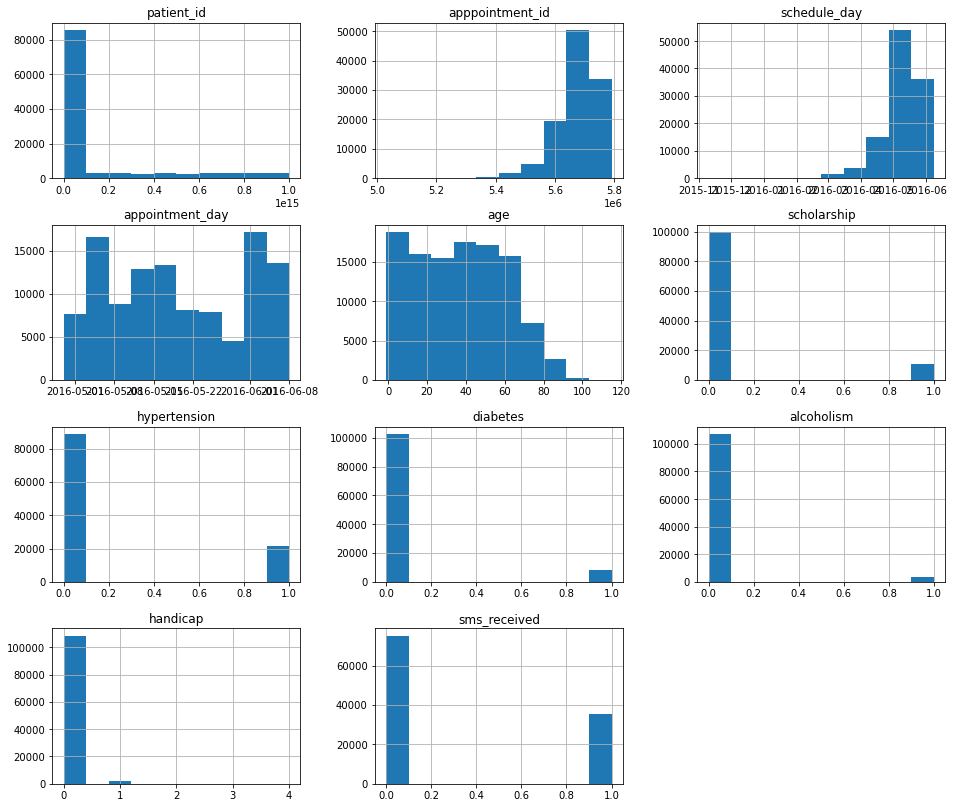

In [26]:
#Viewing the Histogram of all the Columns to have more insight in exploring the Dataset
df.hist(figsize=(16,14));

### Research Question 1 (How many Patients Missed Their Appointments!)

In [27]:
#getting the total number of all appointments(missed/show)
all_appointments = df.shape[0]

In [58]:
#counting number of missed appointments
missed_appointments = len(df.query('no_show == \'Yes\''))

In [63]:
#function to calculate ratio othose missed
def missed_ratio(num_missed, total_no):
    percentage= num_missed/total_no*100
    percentage=round(percentage)
    percentage=int(percentage)
    return (percentage)


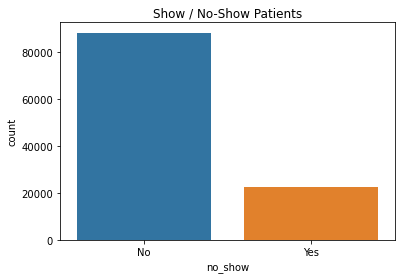

20% of appointments were missed.


In [66]:
#plotting the chart
ax = sns.countplot(x=df.no_show, data=df)
#setting title for the chart
ax.set_title("Show / No-Show Patients")
#displaying the chart
plt.show();
#printing percentage of those that missed theri appointments
print('{}% of appointments were missed.'.format(missed_ratio(missed_appointments,all_appointments)))

### Research Question 2  (Which Gender missed their appointment the most, male or female?)

In [67]:
#getting total number of males in the dataset
total_females = len(df.loc[df['gender'] == "F"])

#getting total number of males in the dataset
total_males = len(df.loc[df['gender'] == "M"])

In [68]:
#getting the number of females that did not showup to their appointments
no_show_females = len(df.query('no_show == "Yes" and gender == "F"'))

#getting the number of males that did not showup to their appointments
no_show_males = len(df.query('no_show == "Yes" and gender == "M"'))

In [69]:
#calculating the ratio of females that missed their appointments to that of the total number

missed_ratio(no_show_females, total_females)
female_ratio = missed_ratio(no_show_females, total_females)

#calculating the ratio of females that missed their appointments to that of the total number
male_ratio = missed_ratio(no_show_males, total_males)

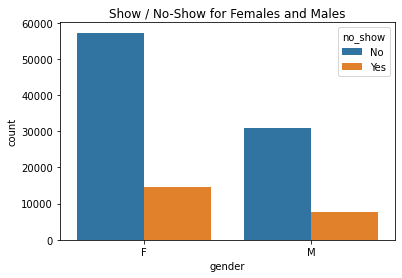

In [40]:
#using seaborn to plot the histogram
ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
#setting title for the graph
ax.set_title("Show / No-Show for Females and Males")
#setting label for the properties
x_ticks_labels=['Female', 'Male']
#showing the graph
plt.show();

In [70]:
#Printing ratio of those that missed their appointments
print('{}% of Females Missed their appointments.'.format(female_ratio))
print('{}% of Males Missed their appointments.'.format(male_ratio))

20% of Females Missed their appointments.
20% of Males Missed their appointments.


<a id='conclusions'></a>
## Conclusions

> From our analysis,
> > we can conclude that only 20% of the patients Missed their appointment.<br/>
> > 20% of Females Missed their appointments.<br/>
20% of Males Missed their appointments.<br/>
No particular gender have a high risk of missing their appointment
## Limitation
> Most of our values are categorical,
> We did not have alot of details, e.g the number of days a patient make appointment and the day he/she is scheduled.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])